
# Dense Subgroups in Networks, Communities and Motif counting
### Till 05.04.2017

At this time there is no rigorous and universally accepted definition of community in field of network
analysis. However, one could formulate some properties that all communities are desired to exhibit, for example:
* Low overlapping
* Density
* Low distance (diameter)
* Connectivity

In [16]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist, squareform
import itertools
from itertools import starmap
plt.xkcd()
%matplotlib inline

### Cliques

Taking into account the requirements above, one of the suitable extreme cases is a **clique** (complete subgraph).

However, if cliques with 3 nodes can be found in real networks with a very frequent rate, cliques of bigger size are rare. Besides, it does not worth to cross off from the list of potential communities a structure that lack of only one edge between vertices to be a clique. So...
<br\>
**Pros:**
+ Dense
+ Low overlapping (as size increases)

**Cons:**
+ Very strict

### k-clique, k-club, k-clan, k-plex

The are several relaxations of the clique concept.

Given a graph $G = (V,E)$ **k-clique** is a maximal subset $S \subseteq V$ s.t.

$$\forall\ u, v\ \in S,\ d_G(u,v) <= k\text{,}$$
where $d_G(\cdot, \cdot)$ denotes the length of the shortest path between nodes in graph $G$.

What about overlapping and cohesion here? <span style="color:white;">Non-membership fail, overlapping</span>

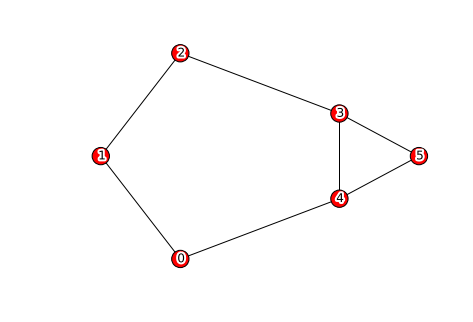

In [14]:
G = nx.cycle_graph(5)
G.add_node(5)
G.add_edges_from([(4,5), (3, 5)])
nx.draw_spectral(G)

In [13]:
# Complete function that exhastively search for k-cliques in graph G
# Use itertools.combinations to get combinations of nodes for subgraphs and node pairs
#
def FindKCliques(G, k):
    n = G.order()
    V = G.nodes()
    kCliques = []
    # Iterate over sizes
    for grSize in xrange(n, 1, -1):
        # Iterate over subgraphs
        for subV in itertools.combinations(V, grSize):
            # Not included in maximal and all distances are <= k
            if not any([set(subV).issubset(kcl) for kcl in kCliques]):
                if all([nx.shortest_path_length(G, pairs[0], pairs[1]) <= k for pairs in itertools.combinations(subV, 2)]):
                        kCliques.append(subV)
            
    return kCliques

In [17]:
FindKCliques(G, 2)

[(0, 1, 2, 3, 4), (0, 2, 3, 4, 5)]

Let's move to k-clans: **k-clan** is a k-clique $S$ s.t. diameter of induced subgraph $G[S] <= k$

What it gives us? <span style="color:white;">More cohesion, non-membership fail fixed</span>
______________________________

As an analogy to k-cores and another relaxation of cliques **k-plex** comes on the scene. 

k-plex is a subset of vertices $S$ if the minimum degree in the induced subgraph $d_\min(G[S]) >= |S| - k$.
<br\>
In English: every node in k-plex is connected to every other node, except $k$ of them.

k-pleces are harder to compute, however they posses some good properties. If $G_S$ is k-plex then:
* Every subgraph of $G_S$ is a k-plex
* If $k < \frac{n+2}{2} \rightarrow \text{diameter}(G_S) \leq 2$
* $\mathfrak{K}(G) > n - 2k +2$
<br\>
where $\mathfrak{K}(G)$ is the minimum number of vertices whose
removal results in a disconnected or trivial graph

### K-Cores

Generate some graph and draw its core decomposition

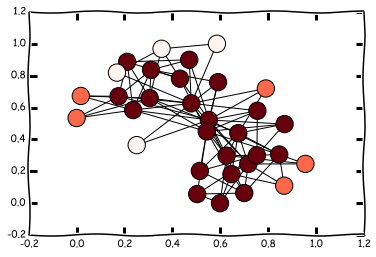

In [22]:
# Put your code here
G = nx.davis_southern_women_graph()
n_core = nx.core_number(G)
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, 
                 with_labels = False,
                 node_list = n_core.keys(), 
                 node_color = n_core.values(), 
                 cmap=plt.cm.Reds)

### Motifs

Generate directed scale free graph nx.scale_free_graph() and set some motif template. Write a function that check the presence of the motif in the graph.

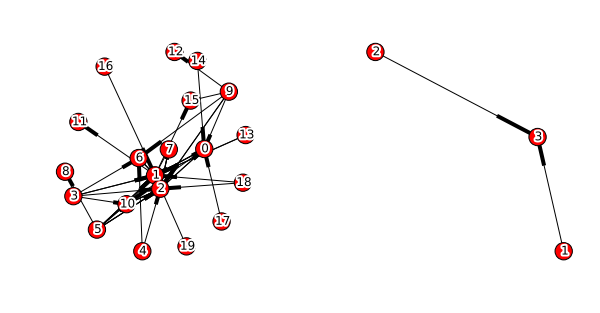

In [37]:
params = np.array([1.,5.,1.])
params /= np.sum(params)
G = nx.scale_free_graph(20, alpha=params[0], beta=params[1], gamma=params[2])
plt.figure(figsize=(10,5))
plt.subplot(121)
nx.draw_spring(G)

motif = nx.DiGraph([ (1,3), (2,3)])
plt.subplot(122)
nx.draw(motif)

In [38]:
# Continue your code here
# ...
V = G.nodes()
for subV in itertools.combinations(V, 3):
    subG = nx.subgraph(G, subV)
    if nx.is_isomorphic(subG, motif):
        print subG.nodes()

[0, 10, 3]
[0, 9, 14]
[0, 9, 17]
[0, 17, 14]
[3, 4, 6]
[9, 3, 6]
[9, 4, 6]


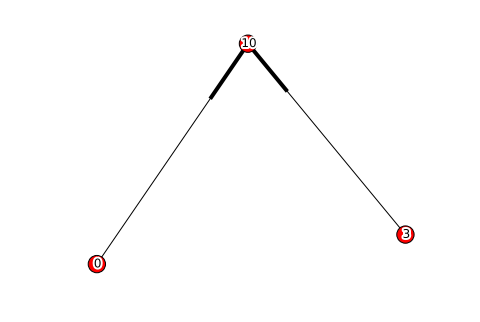

In [39]:
subG = nx.subgraph(G,[0, 10, 3])
nx.draw(subG)

### Hierarichal Clustering

Take some toy-graph, compute any kind of similarity matrix and perform hierarichal clustering.

Helpful functions: pdist(A,'cosine'), hierarchy.average(), hierarchy.dendrogram()

In [44]:
# Continue your code here
# 
G = nx.karate_club_graph()
A = nx.to_numpy_matrix(G)
M = pdist(A, 'cosine')
M = squareform(M)


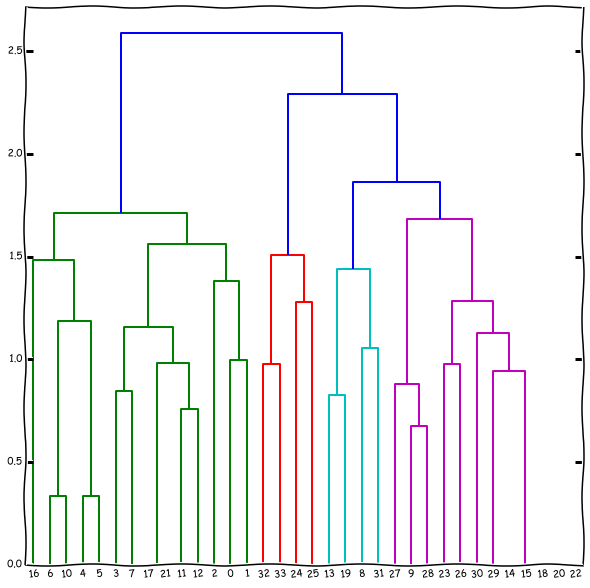

In [49]:
Z = hierarchy.average(M)
plt.figure(figsize=(10,10))
D = hierarchy.dendrogram(Z)

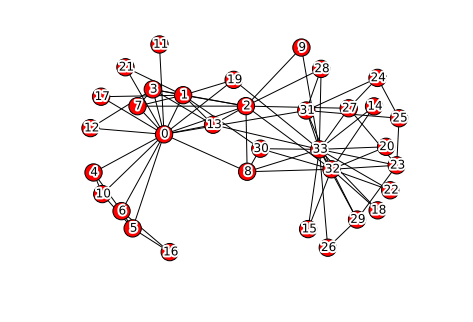

In [50]:
nx.draw(G)

## Task

Implement community detection algorithm based on hierarchy clustering over assortativity mixing.
Analyze twitter or vkontakte network using [sentiment analysis tool](http://mpqa.cs.pitt.edu/opinionfinder/) to identify assortativity of happiness in social network. Use the results from the [research](https://arxiv.org/pdf/1103.0784.pdf).
Identify the most often mortifs of size <=4.